In [1]:
# Required libraries  
from utils import one_hot_encode, binarize_data, binarize_3d, plot_central_planes, plot_3d, create_dir
   
import os
import glob
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import cv2

In [2]:
datasets_base_path = '../03_CT_Scan_Images/' #path to directory with '.mat' datasets
datasets_base_path = '03 CT Scan Images/'
datasets = glob.glob(datasets_base_path +'*.mat') #find all '.mat' datasets in the directory
dataset_names = [path.replace(datasets_base_path, '').replace('.mat', '') for path in datasets] #extract dataset name

In [3]:
id_ = 0 #TO DEFINE, index of the dataset in 'datasets' variable

print(dataset_names[id_] + ' dataset is chosen\n')
rawMatData = loadmat(datasets[id_]) # load dataset with id_ = 0
bwImage = rawMatData["bwImage"]
ctImage = rawMatData["ctImage"]

print('Data shape: ', ctImage.shape)

03 CT Scan Images\Beta_1_0.2 dataset is chosen

Data shape:  (516, 516, 516)


## Run binarization algorithm

In [21]:
%%time

filters = {'bilateral': [3, 25, 25], 'sharpen': None}

res, res_watershed, res_porosity = binarize_data(
    img=ctImage[:, :, 0],
    k=2,
    filters=filters
)

print('Resulting shape:', res_3d.shape)

Resulting shape: (516, 516)
Wall time: 236 ms


0.20118983234180637


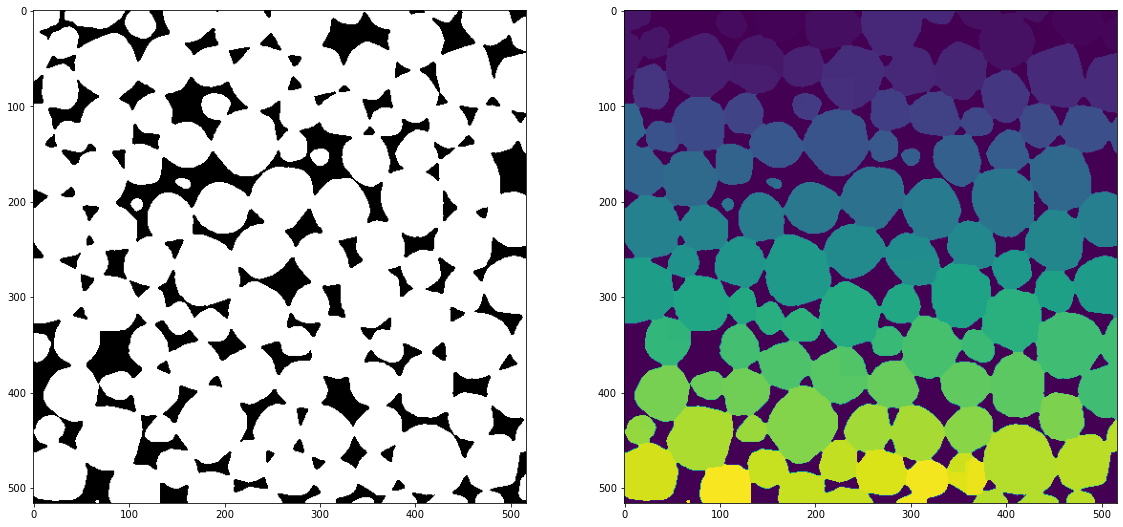

In [35]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(res, 'gray')
plt.subplot(1,3,2)
plt.imshow(res_watershed)

print(res_porosity)